# machine-learning-project

Use the "Run" button to execute the code.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="machine-learning-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/mohammadmaaz533/machine-learning-project


'https://jovian.ai/mohammadmaaz533/machine-learning-project'

In [5]:
!pip install pandas numpy matplotlib seaborn --quiet
!pip install opendatasets scikit-learn jovian --quiet --upgrade
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Installing the essential libraries

In [6]:
od.download('https://www.kaggle.com/c/DontGetKicked/data')

Skipping, found downloaded files in "./DontGetKicked" (use force=True to force download)


Downloading the data set

In [7]:
os.listdir('DontGetKicked')

['example_entry.csv',
 'test.csv',
 'training.zip',
 'training.csv',
 'test.zip',
 'Carvana_Data_Dictionary.txt']

In [8]:
raw_df=pd.read_csv('DontGetKicked/training.csv')
test_df=pd.read_csv('DontGetKicked/test.csv')
submission_df=pd.read_csv('DontGetKicked/example_entry.csv')

Reading the Dataset

In [9]:
raw_df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,1.0,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,NaN,NaN,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,1.0,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,1.0,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [11]:
test_df

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,11/17/2010,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,AUTO,1.0,Alloy,88645,AMERICAN,LARGE,FORD,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,NaN,NaN,20928,33411,FL,7955.0,0,1633
48703,121743,11/17/2010,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,AUTO,2.0,Covers,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,NaN,NaN,20928,33411,FL,7035.0,0,594
48704,121744,11/17/2010,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,AUTO,2.0,Covers,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,NO,GREEN,20928,33411,FL,6335.0,0,594
48705,121745,11/17/2010,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,AUTO,1.0,Alloy,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,NO,GREEN,20928,33411,FL,8055.0,0,1038


In [12]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/mohammadmaaz533/machine-learning-project


'https://jovian.ai/mohammadmaaz533/machine-learning-project'

In [13]:
raw_df.dropna(subset=['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'], inplace=True)


Dropping the rows for which some of the values aren't available 

In [14]:
raw_df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72977,73009,0,12/2/2009,ADESA,2006,3,KIA,SORENTO 2WD,EX,4D SPORT UTILITY EX,GOLD,AUTO,1.0,Alloy,65399,OTHER ASIAN,MEDIUM SUV,OTHER,7843.0,9171.0,8970.0,10405.0,7652.0,9310.0,12148.0,14204.0,NaN,NaN,18111,30212,GA,7900.0,0,1508
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,1.0,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,1.0,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,1.0,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


In [15]:
raw_df.isna().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                     0
SubModel                                 0
Color                                    0
Transmission                             0
WheelTypeID                              0
WheelType                                0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisitonRetailCleanPrice            0
MMRCurrentAuctionAveragePrice            0
MMRCurrentA

In [16]:
raw_df['year'] = pd.to_datetime(raw_df.PurchDate).dt.year
raw_df['month'] = pd.to_datetime(raw_df.PurchDate).dt.month
raw_df['day'] = pd.to_datetime(raw_df.PurchDate).dt.day
raw_df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,year,month,day
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113,2009,12,7
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053,2009,12,7
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389,2009,12,7
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630,2009,12,7
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020,2009,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72977,73009,0,12/2/2009,ADESA,2006,3,KIA,SORENTO 2WD,EX,4D SPORT UTILITY EX,GOLD,AUTO,1.0,Alloy,65399,OTHER ASIAN,MEDIUM SUV,OTHER,7843.0,9171.0,8970.0,10405.0,7652.0,9310.0,12148.0,14204.0,NaN,NaN,18111,30212,GA,7900.0,0,1508,2009,12,2
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,1.0,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993,2009,12,2
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,1.0,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893,2009,12,2
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,1.0,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974,2009,12,2


In [17]:
test_df.isna().sum()

RefId                                    0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1550
SubModel                                 5
Color                                    4
Transmission                             3
WheelTypeID                           2188
WheelType                             2188
VehOdo                                   0
Nationality                              7
Size                                     7
TopThreeAmericanName                     7
MMRAcquisitionAuctionAveragePrice       10
MMRAcquisitionAuctionCleanPrice         10
MMRAcquisitionRetailAveragePrice        10
MMRAcquisitonRetailCleanPrice           10
MMRCurrentAuctionAveragePrice          143
MMRCurrentAuctionCleanPrice            143
MMRCurrentR

In [18]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/mohammadmaaz533/machine-learning-project


'https://jovian.ai/mohammadmaaz533/machine-learning-project'

In [19]:
raw_df['PurchDate'] = pd.to_datetime(raw_df.PurchDate)
test_df['PurchDate'] = pd.to_datetime(test_df.PurchDate)

changing the format of date

In [20]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67270 entries, 0 to 72982
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   RefId                              67270 non-null  int64         
 1   IsBadBuy                           67270 non-null  int64         
 2   PurchDate                          67270 non-null  datetime64[ns]
 3   Auction                            67270 non-null  object        
 4   VehYear                            67270 non-null  int64         
 5   VehicleAge                         67270 non-null  int64         
 6   Make                               67270 non-null  object        
 7   Model                              67270 non-null  object        
 8   Trim                               67270 non-null  object        
 9   SubModel                           67270 non-null  object        
 10  Color                             

In [21]:
test_df['year'] = pd.to_datetime(test_df.PurchDate).dt.year
test_df['month'] = pd.to_datetime(test_df.PurchDate).dt.month
test_df['day'] = pd.to_datetime(test_df.PurchDate).dt.day


In [22]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/mohammadmaaz533/machine-learning-project


'https://jovian.ai/mohammadmaaz533/machine-learning-project'

In [23]:
test_df.info()
test_df['IsBadBuy']=1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48707 entries, 0 to 48706
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   RefId                              48707 non-null  int64         
 1   PurchDate                          48707 non-null  datetime64[ns]
 2   Auction                            48707 non-null  object        
 3   VehYear                            48707 non-null  int64         
 4   VehicleAge                         48707 non-null  int64         
 5   Make                               48707 non-null  object        
 6   Model                              48707 non-null  object        
 7   Trim                               47157 non-null  object        
 8   SubModel                           48702 non-null  object        
 9   Color                              48703 non-null  object        
 10  Transmission                      

Intially adding 1 in place of IsBadBuy

In [24]:
input_cols=['Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
      'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'BYRNO',
        'VehBCost', 'IsOnlineSale', 'WarrantyCost']
target_cols='IsBadBuy'

Separating the input and target colums

In [25]:
!pip install scikit-learn --upgrade --quiet
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(raw_df, test_size=0.25, random_state=42)

print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)

train_df.shape : (50452, 37)
val_df.shape : (16818, 37)


spliting the data into training and validations set Training data is 75% and validation data is 25%

In [26]:

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [27]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

Separting the numeric and categorical colums

In [28]:
print(numeric_cols)

['VehYear', 'VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO', 'VehBCost', 'IsOnlineSale', 'WarrantyCost']


In [29]:
print(categorical_cols)


['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName']


In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

Imputing the missing values with the means

In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48707 entries, 0 to 48706
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   RefId                              48707 non-null  int64         
 1   PurchDate                          48707 non-null  datetime64[ns]
 2   Auction                            48707 non-null  object        
 3   VehYear                            48707 non-null  int64         
 4   VehicleAge                         48707 non-null  int64         
 5   Make                               48707 non-null  object        
 6   Model                              48707 non-null  object        
 7   Trim                               47157 non-null  object        
 8   SubModel                           48702 non-null  object        
 9   Color                              48703 non-null  object        
 10  Transmission                      

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])
val_inputs.describe().loc[['min', 'max']]

,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VehBCost,IsOnlineSale,WarrantyCost
min,-222.333333,0.000000,-0.048646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.008441,-0.040580,0.0,-0.065662
max,-222.222222,0.111111,-0.048637,0.000016,0.000018,0.000017,0.000018,0.000016,0.000018,0.000016,0.000017,-0.008431,-0.040568,1.0,-0.065520


Scaling the values for accurate training of the model

In [36]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))




Using One hot encoder for encoding of categorical colums

In [37]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])

In [38]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [39]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [40]:
test_inputs

Auction     VehYear  VehicleAge       Make           Model Trim  \
0        ADESA -222.283951    0.049383    PONTIAC      GRAND PRIX  Bas   
1        ADESA -222.283951    0.049383  CHEVROLET       MALIBU V6   LS   
2        ADESA -222.271605    0.037037      DODGE  DURANGO 2WD V8  Adv   
3        ADESA -222.320988    0.086420     SATURN        L SERIES  L20   
4        ADESA -222.259259    0.024691    HYUNDAI          ACCENT   GS   
...        ...         ...         ...        ...             ...  ...   
48702  MANHEIM -222.283951    0.061728       FORD    FIVE HUNDRED  SEL   
48703  MANHEIM -222.259259    0.037037     TOYOTA         COROLLA   CE   
48704  MANHEIM -222.271605    0.049383        KIA         SPECTRA   EX   
48705  MANHEIM -222.283951    0.061728      MAZDA          MAZDA3    s   
48706  MANHEIM -222.308642    0.086420      BUICK  RENDEZVOUS AWD   CX   

                     SubModel   Color Transmission WheelType    VehOdo  \
0                    4D SEDAN  SILVER         AUTO     Alloy -0.048639   
1                 4D SEDAN LS  SILVER         AUTO     Alloy -0.048641   
2      4D SUV 4.7L ADVENTURER  SILVER         AUTO     Alloy -0.048640   
3               4D SEDAN L200    GOLD         AUTO     Alloy -0.048639   
4                 2D COUPE GS    BLUE         AUTO       NaN -0.048640   
...                       ...     ...          ...       ...       ...   
48702            4D SEDAN SEL   BLACK         AUTO     Alloy -0.048639   
48703             4D SEDAN CE   GREEN         AUTO    Covers -0.048639   
48704             4D SEDAN EX   BLACK         AUTO    Covers -0.048639   
48705             4D SEDAN GT  SILVER         AUTO     Alloy -0.048640   
48706               4D SUV CX    GOLD         AUTO    Covers -0.048639   

          Nationality        Size TopThreeAmericanName  \
0            AMERICAN       LARGE                   GM   
1            AMERICAN      MEDIUM                   GM   
2            AMERICAN  MEDIUM SUV             CHRYSLER   
3            AMERICAN      MEDIUM                   GM   
4         OTHER ASIAN     COMPACT                OTHER   
...               ...         ...                  ...   
48702        AMERICAN       LARGE                 FORD   
48703  TOP LINE ASIAN     COMPACT                OTHER   
48704     OTHER ASIAN      MEDIUM                OTHER   
48705     OTHER ASIAN      MEDIUM                OTHER   
48706        AMERICAN  MEDIUM SUV                   GM   

       MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
0                               0.000004                         0.000005   
1                               0.000004                         0.000004   
2                               0.000008                         0.000010   
3                               0.000002                         0.000003   
4                               0.000004                         0.000005   
...                                  ...                              ...   
48702                           0.000004                         0.000005   
48703                           0.000005                         0.000006   
48704                           0.000004                         0.000004   
48705                           0.000005                         0.000006   
48706                           0.000003                         0.000003   

       MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  \
0                              0.000004                       0.000005   
1                              0.000004                       0.000004   
2                              0.000008                       0.000009   
3                              0.000002                       0.000003   
4                              0.000004                       0.000005   
...                                 ...                            ...   
48702                          0.000006                       0.000007   
48703          

In [41]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

Finalizig the inputs

In [42]:
X_test

VehYear  VehicleAge    VehOdo  MMRAcquisitionAuctionAveragePrice  \
0     -222.283951    0.049383 -0.048639                           0.000004   
1     -222.283951    0.049383 -0.048641                           0.000004   
2     -222.271605    0.037037 -0.048640                           0.000008   
3     -222.320988    0.086420 -0.048639                           0.000002   
4     -222.259259    0.024691 -0.048640                           0.000004   
...           ...         ...       ...                                ...   
48702 -222.283951    0.061728 -0.048639                           0.000004   
48703 -222.259259    0.037037 -0.048639                           0.000005   
48704 -222.271605    0.049383 -0.048639                           0.000004   
48705 -222.283951    0.061728 -0.048640                           0.000005   
48706 -222.308642    0.086420 -0.048639                           0.000003   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
0                             0.000005                          0.000004   
1                             0.000004                          0.000004   
2                             0.000010                          0.000008   
3                             0.000003                          0.000002   
4                             0.000005                          0.000004   
...                                ...                               ...   
48702                         0.000005                          0.000006   
48703                         0.000006                          0.000007   
48704                         0.000004                          0.000005   
48705                         0.000006                          0.000006   
48706                         0.000003                          0.000005   

       MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
0                           0.000005                       0.000004   
1                           0.000004                       0.000004   
2                           0.000009                       0.000009   
3                           0.000003                       0.000002   
4                           0.000005                       0.000004   
...                              ...                            ...   
48702                       0.000007                       0.000005   
48703                       0.000007                       0.000005   
48704                       0.000006                       0.000004   
48705                       0.000007                       0.000004   
48706                       0.000005                       0.000004   

       MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
0                         0.000005                      0.000006   
1                         0.000004                      0.000005   
2                         0.000009                      0.000010   
3                         0.000003                      0.000004   
4                         0.000005                      0.000004   
...                            ...                           ...   
48702                     0.000005                      0.000006   
48703                     0.000006                      0.000007   
48704                     0.000004                      0.000005   
48705                     0.000005                      0.000006   
48706                     0.000004                      0.000005   

       MMRCurrentRetailCleanPrice     BYRNO  VehBCost  IsOnlineSale  \
0                        0.000006 -0.008439 -0.040575           0.0   
1                        0.000006 -0.008439 -0.040576           0.0   
2                        0.000010 -0.008439 -0.040573           0.0   
3                        0.000004 -0.008439 -0.040577           0.0   
4                        0.000005 -0.008439 -0.040577           0.0   
...                           ...       ...       ...           

In [43]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/mohammadmaaz533/machine-learning-project


'https://jovian.ai/mohammadmaaz533/machine-learning-project'

I am gonna use two models for training Decission Tree Classifier and Random Forest for training the model.

In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix
train_preds = model.predict(X_train)

pd.value_counts(train_preds)

0    45650
1     4802
dtype: int64

In [46]:
accuracy_score(train_targets, train_preds)

0.9998017918021089

In [47]:
model.score(X_val, val_targets)

0.8300630277084077

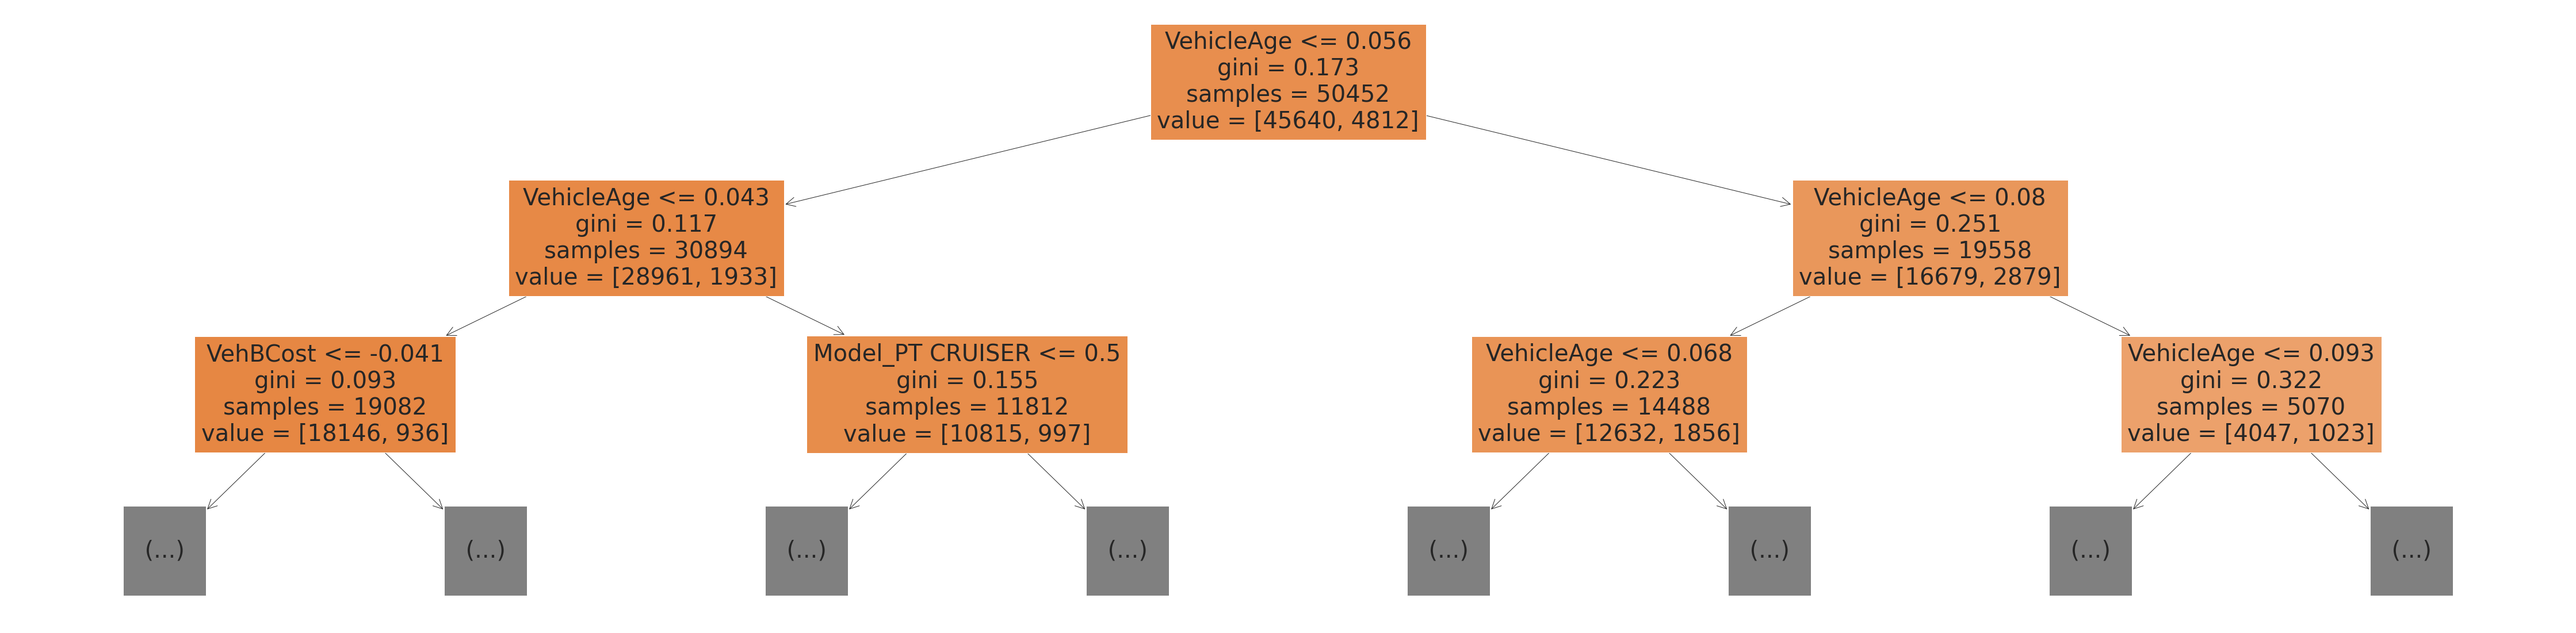

In [48]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [49]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
12,VehBCost,0.085477
2,VehOdo,0.082987
11,BYRNO,0.066025
10,MMRCurrentRetailCleanPrice,0.047804
14,WarrantyCost,0.042468
9,MMRCurrentRetailAveragePrice,0.042191
8,MMRCurrentAuctionCleanPrice,0.038319
6,MMRAcquisitonRetailCleanPrice,0.037341
7,MMRCurrentAuctionAveragePrice,0.037128
4,MMRAcquisitionAuctionCleanPrice,0.036556


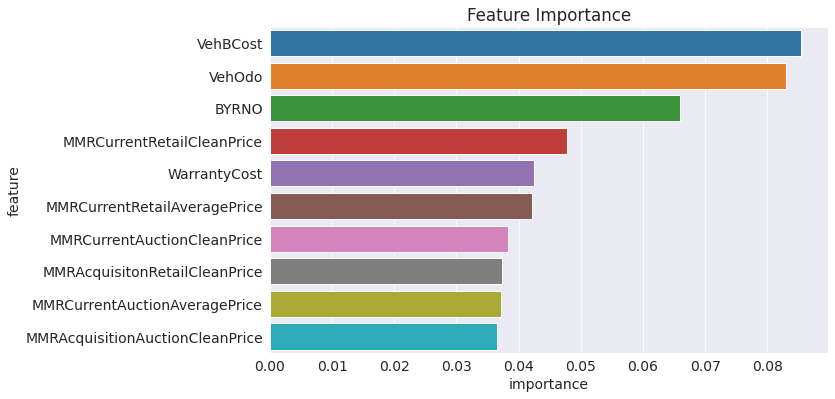

In [50]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Tuning of hyperparameters

In [97]:
model = DecisionTreeClassifier(max_depth=95, random_state=42)
model.fit(X_train, train_targets)
model.score(X_train, train_targets)


0.9955006739078728

In [98]:
model.score(X_val, val_targets)

0.8303603282197646

In [99]:
test_preds=model.predict(X_test)

In [100]:
pd.value_counts(test_preds)

0    43711
1     4996
dtype: int64

In [101]:
submission_df['IsBadBuy']=test_preds
pd.value_counts(submission_df['IsBadBuy'])

0    43711
1     4996
Name: IsBadBuy, dtype: int64

In [102]:
submission_df.to_csv('submission3.csv', index=None)
from IPython.display import FileLink
# Doesn't work on Colab, use the file browser instead.
FileLink('submission3.csv')

/content/submission3.csv

Model 2 Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(X_train, train_targets)



RandomForestClassifier(n_jobs=-1, random_state=42)

In [105]:
model.score(X_train, train_targets)

0.9979188139221438

In [106]:
model.score(X_val, val_targets)

0.9018313711499584

In [107]:
test_preds=model.predict(X_test)


In [108]:
pd.value_counts(test_preds)

0    48442
1      265
dtype: int64

In [109]:
submission_df['IsBadBuy']=test_preds
pd.value_counts(submission_df['IsBadBuy'])

0    48442
1      265
Name: IsBadBuy, dtype: int64

In [ ]:
submission_df.to_csv('submission.csv', index=None)
from IPython.display import FileLink
# Doesn't work on Colab, use the file browser instead.
FileLink('submission.csv')

/content/submission.csv

In [110]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
2,VehOdo,0.062262
12,VehBCost,0.059793
14,WarrantyCost,0.051336
10,MMRCurrentRetailCleanPrice,0.049688
9,MMRCurrentRetailAveragePrice,0.049144
11,BYRNO,0.048455
8,MMRCurrentAuctionCleanPrice,0.047723
6,MMRAcquisitonRetailCleanPrice,0.047155
7,MMRCurrentAuctionAveragePrice,0.046476
5,MMRAcquisitionRetailAveragePrice,0.046140


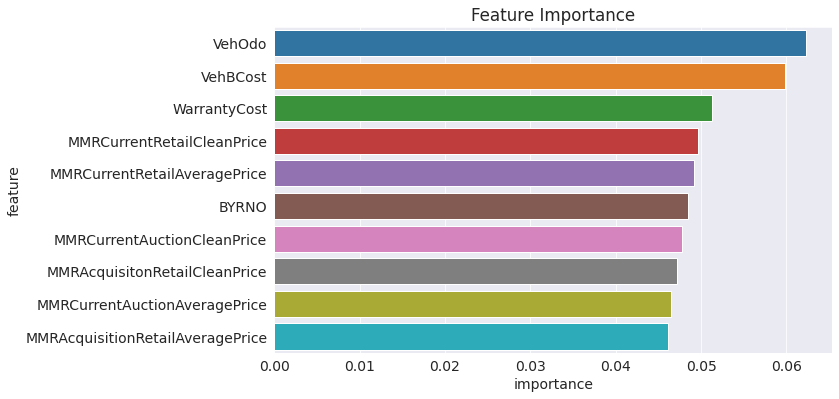

In [111]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [112]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/mohammadmaaz533/machine-learning-project


'https://jovian.ai/mohammadmaaz533/machine-learning-project'

Tuning the hyperparamters of Random Forest

In [168]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=3,
                               max_features=30,
                               max_depth=120
                               )

In [169]:
model.fit(X_train, train_targets)

RandomForestClassifier(max_depth=120, max_features=30, n_estimators=3,
                       n_jobs=-1, random_state=42)

In [170]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.968346150796797, 0.8763229872755381)

In [171]:
test_preds = model.predict(X_test)

In [172]:
test_preds
pd.value_counts(test_preds)

0    46601
1     2106
dtype: int64

In [173]:
submission_df['IsBadBuy']=test_preds

In [174]:
train_probs = model.predict_proba(X_test)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [175]:
submission_df.to_csv('submission4.csv', index=None)
from IPython.display import FileLink
# Doesn't work on Colab, use the file browser instead.
FileLink('submission4.csv')

/content/submission4.csv

In [178]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/mohammadmaaz533/machine-learning-project


'https://jovian.ai/mohammadmaaz533/machine-learning-project'

I have submitted the results of both my models and recived a negative score of -0.0054 and -0.0042 I ranked on 565 out of 570 still trying to tune parameters for good position.

In [ ]:
jovian